In [1]:
from agent import Agent
from tensorflow import keras as tfk
from tensorflow.keras.layers import Dense, Input

from environment import *
from utils import train_agent

from tqdm import trange
import matplotlib.pyplot as plt

import mplhep
mplhep.style.set_style("CMS")

from cytools import fetch_polytopes

/tmp/ipykernel_34623/2677491238.py:12: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  mplhep.style.set_style("CMS")


In [2]:
p = Polytope([
    [-1, -1,  1, -1],
    [ 0,  0,  0,  1],
    [ 0,  1,  0,  0],
    [ 1,  0,  0,  0],
    [-1,  0, -1,  0],
    [ 0, -1, -1,  0],
    [ 0,  0,  1,  0]])
s_env = FibrationEnvironment(p, 2)

# Initialize agent
model = tfk.Sequential([
    Input((s_env.random_state().shape[0],)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(s_env.num_actions, activation='linear')
])

optim = tfk.optimizers.Adam(learning_rate = 1e-3)
model.compile(
    loss = tfk.losses.MeanSquaredError(),
    optimizer = optim,
    metrics = [tfk.metrics.MeanAbsoluteError()])

agent = Agent(model)

# Train the agent
loss_vals = agent.fit(s_env, num_epochs = 2048, verbosity = 1)
loss_vals

Epoch 2047, loss = 3.878148e-02: 100%|█████████████████████████████████████████████████████████████████████████████████████| 2048/2048 [12:19<00:00,  2.77it/s]


array([[4.10000000e+01, 3.14436734e-01],
       [4.20000000e+01, 2.99400646e-01],
       [4.30000000e+01, 3.16598833e-01],
       ...,
       [2.04500000e+03, 4.54782601e-02],
       [2.04600000e+03, 3.38788480e-02],
       [2.04700000e+03, 3.87814753e-02]])

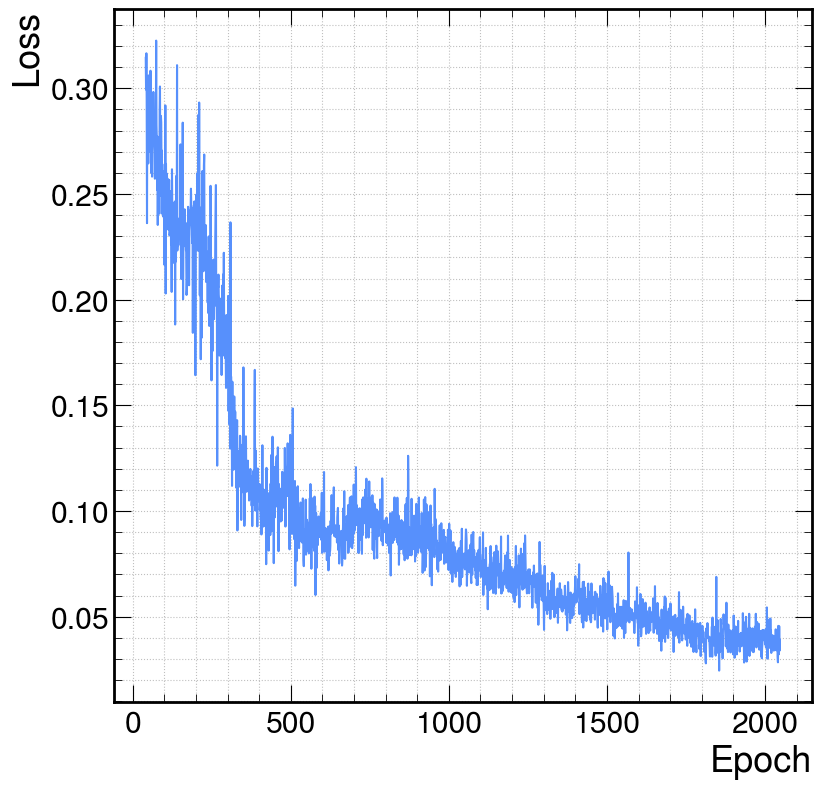

In [14]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.plot(loss_vals[:,0], loss_vals[:,1])
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.grid(True, 'both')

In [15]:
path = agent.walk(s_env.random_state(), s_env)
s_env.fitness(path[-1])

(6.0, True)

In [16]:
triang, subpoly = s_env.get_structure(path[-1])
triang, subpoly

(A fine, regular, star triangulation of a 4-dimensional point configuration with 8 points in ZZ^4,
 A 2-dimensional lattice polytope in ZZ^4)